## Series de Taylor

Una serie de Taylor es una **aproximación de funciones** diferenciables mediante una serie de potencias o suma de potencias enteras de polinomios en $$(x-a)^{n}$$. Dicha serie se calcula a partir de las derivadas de la función evaluadas en un determinado punto $a$. A la serie de Taylor alrededor del origen $a=0$ se le denomina serie de MacLaurin.

* la derivación e integración de una de estas series se puede realizar término a término, que resultan operaciones triviales
* se puede utilizar para calcular valores aproximados de funciones;
* es posible calcular la optimidad de la aproximación.

### Definición
La serie de Taylor para una función real o compleja $f(x)$ que es infinitamente diferenciable, $C^2$, alrededor del punto $a$ es la serie de potencias:

$$f(x) = f(a)+\frac {f'(a)}{1!} (x-a)+ \frac{f''(a)}{2!} (x-a)^2+\frac{f'''(a)}{3!}(x-a)^3+ \cdots,$$

para **$x$ cercanas a $a$**. Si denotamos $f^{(n)}(a)$ como la *n*-ésima derivada de la función $f$ evaluada en el punto $a$ podemos reescribir la serie como 

$$\sum_{n=0} ^ {\infty} \frac {f^{(n)}(a)}{n!} (x-a)^{n}.$$

Vamos a hacer unos ejemplos:

## Sea  $f(x)=\frac{1}{1-x}$

Veamos primeramente como es la gráfica.

In [1]:
using Plots

gr()

Plots.GRBackend()

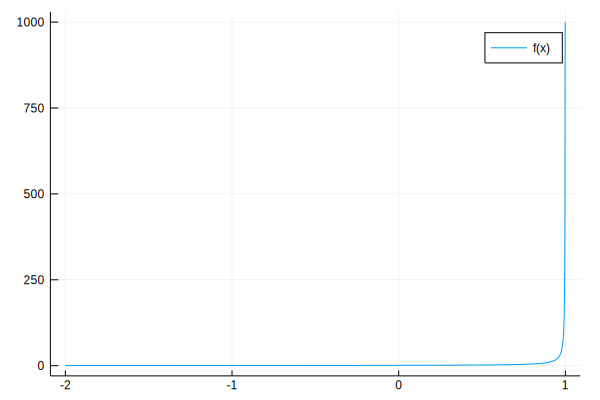

In [2]:
f(x)=1/(1-x)
δ=1e-3
xes = -2:δ:1

plot(xes,[f(x) for x in xes], lab="f(x)",)

In [22]:
xes=[i for i in -2:δ:1]

3001-element Array{Float64,1}:
 -2.0  
 -1.999
 -1.998
 -1.997
 -1.996
 -1.995
 -1.994
 -1.993
 -1.992
 -1.991
 -1.99 
 -1.989
 -1.988
  ⋮    
  0.989
  0.99 
  0.991
  0.992
  0.993
  0.994
  0.995
  0.996
  0.997
  0.998
  0.999
  1.0  

In [4]:
1/Inf

0.0

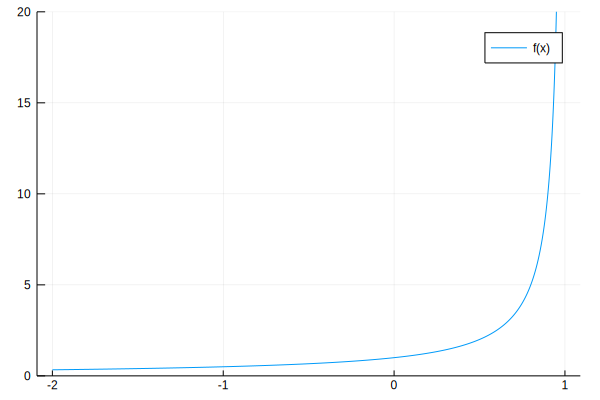

In [3]:
ylims!(0,20)

Vamos a calcular la serie alrededor del origen $a=0$. Primero las derivadas y luego las evaluamos

$$f'(x) = \frac{d}{dx}\frac{1}{1-x}=(-1)(1-x)^{-2}(-1)$$
$$f''(x) = \frac{d^2}{dx^2}\frac{1}{1-x}=(-2)(1-x)^{-3}(-1)$$
$$ \vdots$$

$$f^{(n)}(x) = n!(1-x)^{-(n+1)}$$

Por lo tanto podemos reescribrir nuestra función original como 

$$\frac{1}{1-x} = 1 + x + x^2 + x^3 \cdots$$

**Veamos el comportamiento de la serie conforme le agregamos términos**

In [6]:
f(-1)

0.5

In [9]:
x_0=-1
1+x_0+x_0^2+x_0^3+x_0^4

1

In [27]:
function serie_f(n,x)
    serie = 0
    for i in 0:n
        serie += x^i 
    end
    return serie
end

serie_f (generic function with 1 method)

In [20]:
serie_f(100,-0.5)

0.6666666666666667

In [18]:
serie_f(100,-2)

-6148914691236517205

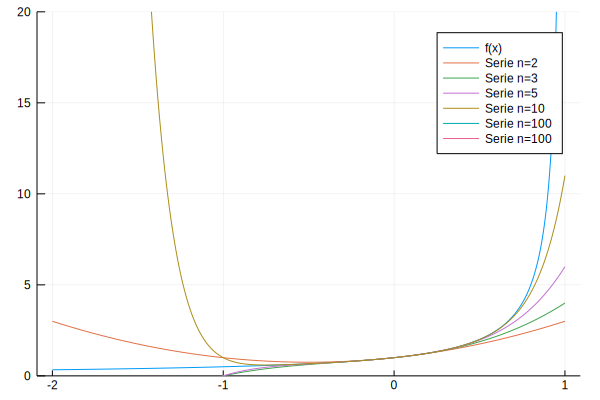

In [33]:
n=100
plot!(xes,[serie_f(n,x) for x in xes],lab="Serie n=$n")

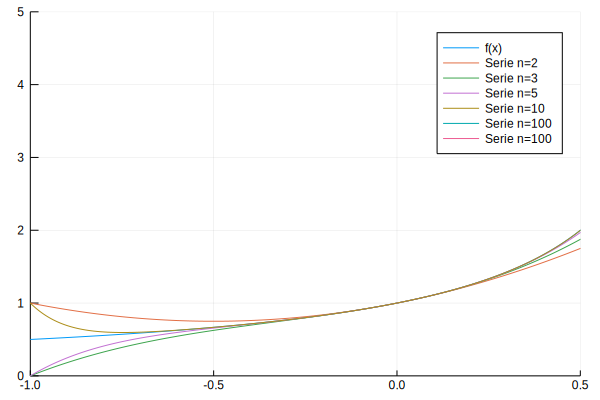

In [34]:
xlims!(-1,0.5)
ylims!(0,5)

## f(x) = cos(x)

### Ejercicio

Escriban un código que evalue los primeros *n* términos de la serie de taylor asociada a $\cos(x)$, cerca de $a=0$


$$f(x) = f(a)+\frac {f'(a)}{1!} (x-a)+ \frac{f''(a)}{2!} (x-a)^2+\frac{f'''(a)}{3!}(x-a)^3+ \cdots,$$

$$f'(x) = -sin(x)$$

$$f''(x) = -cos(x)$$

$$\vdots$$

$$f'(0) = 0$$

$$f'(0) = -1$$

$$\vdots$$



In [35]:
function serie_cos(n,x)
    serie = 0
    for i in 0:n
        serie += ((-1)^i)*x^(2*i) /factorial(2i)
    end
    return serie
end

serie_cos (generic function with 1 method)

In [38]:
serie_cos(10,pi/2)

6.08176268469988e-17

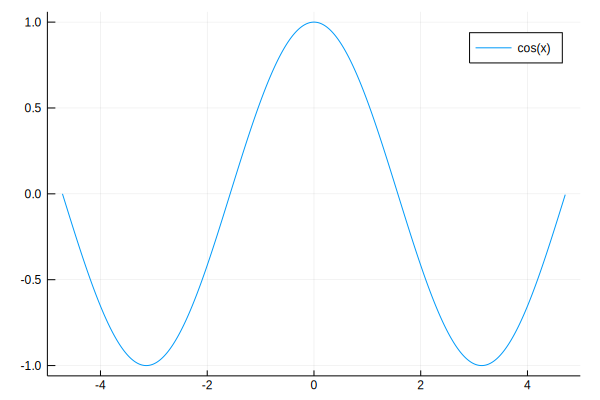

In [42]:
dominio = [i for i in -3pi/2:0.01:3pi/2]

plot(dominio,[cos(x) for x in dominio], lab="cos(x)")

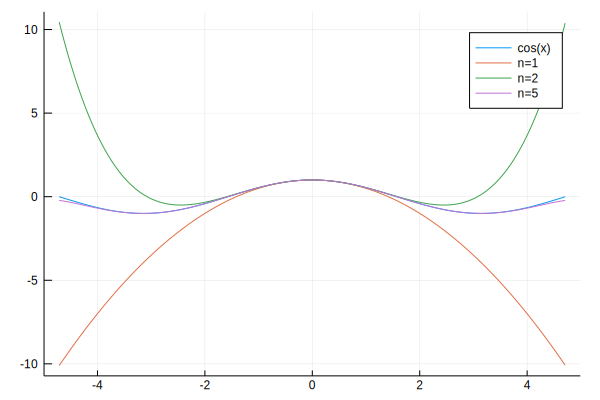

In [46]:
n=5
plot!(dominio,[serie_cos(n,x) for x in dominio],lab="n=$n")

# Diferencias finitas: cálculo numérico de derivadas

Vimos que el método de Newton requiere utilizar la derivada de una función. Ahora veremos una manera (no necesariamente la mejor) de calcular derivadas de funciones de forma numérica: **diferencias finitas**.

#### Ejercicio 1

Considera una función uni-dimensional $f: \mathbb{R} \to \mathbb{R}$, y supón que sea suficientemente diferenciable para que las derivadas que tomemos estén definidas [por ejemplo, si $f$ es de clase $C^\infty$].

(i) Escribe, usando notación LaTeX, la definición de la derivada $f'(a)$ de $f$ en el punto $a$.

$$\frac{df(x)}{dx}|_{x=a} = \lim_{h\to0} \frac{f(a+h)-f(a)}{h}$$

Desgraciadamente, **no podemos llevar a cabo el proceso de límite en la computadora**: un límite es algo **continuo**, mientras que la computadora maneja cantidades **discretas**.

(ii) ¿Cuál solución se te ocurre para esto en términos de la variable $h$? 

$$\frac{df(x)}{dx}|_{x=a} \approx \frac{f(a+h)-f(a)}{h} $$

si $h\ll1$

La expresión $f(a+h) - f(a)$ se llama una **diferencia para adelante** ("forward difference"), y cuando lo dividimos por un valor fijo de $h$ se llama un **cociente de diferencias** ("difference quotient"). Pero todo junto tambien se llama una diferencia finita.

(iii) ¿Geométricamente, a qué corresponde una diferencia de este tipo? ¿Y un cociente de diferencias?

Si $Y_1 = f(X_1)$ y $Y_0 = f(X_0)$  donde $X_1-X_0 = h$

#### Ejercicio 

(i) Escribe una función que implemente una diferencia para adelante para una función $f$, punto $a$ y paso $h$ dadas.

In [9]:
function dif_fin(f,a,h)
    return (f(a+h)-f(a))/h
end

dif_fin (generic function with 1 method)

In [50]:
g(x) = sin(x)
x_0 = pi/4
h = 0.1
dif_fin(g,x_0,h)

0.6706029729039897

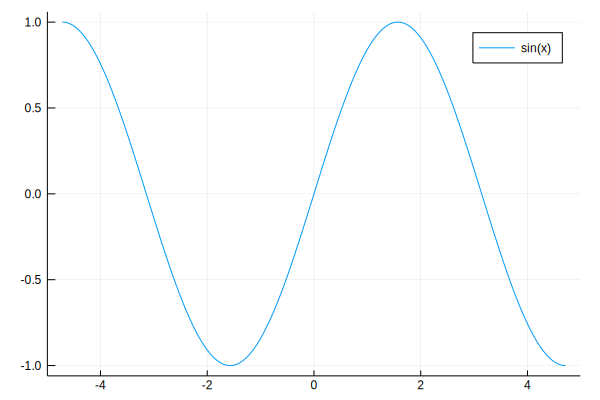

In [49]:
plot(dominio,[sin(x) for x in dominio],lab="sin(x)")

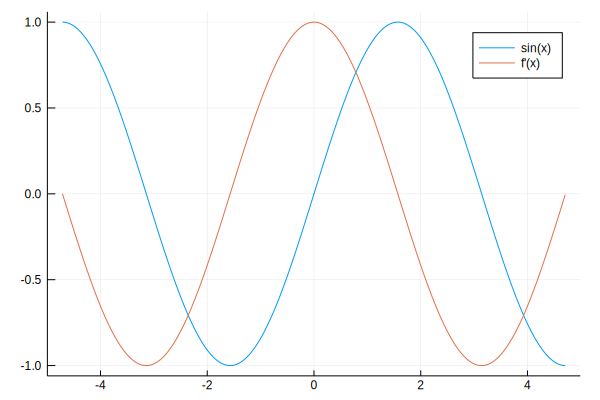

In [51]:
plot!(dominio,[cos(x) for x in dominio],lab="f'(x)")

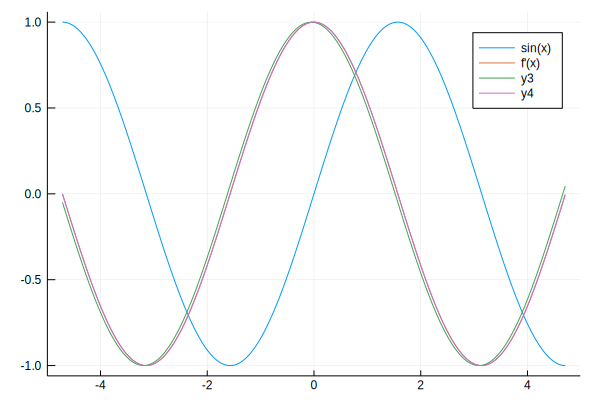

In [53]:
plot!(dominio,[dif_fin(sin,x,0.001) for x in dominio])

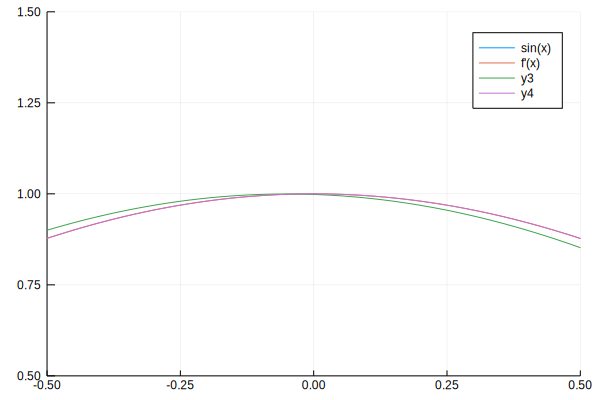

In [56]:
ylims!(.5,1.5)
xlims!(-.5,.5)

(ii) Para distintas funciones $f$, grafica la función $f$, su derivada analítica $f'$, y la aproximación a $f'$ utilizando diferencias finitas con distintos pasos $h$.

In [6]:
using Plots
gr()

Plots.GRBackend()

In [5]:
g(x) = exp(-x^2/2)
dg(x) = exp(-x^2/2)*(-x)


dg (generic function with 1 method)

In [15]:
h(x) = sin(1/x)
dh(x) = cos(1/x)*(-x^(-2))

dh (generic function with 1 method)

El dominio de ambas gráficas es $x\in[0+\delta,5]$

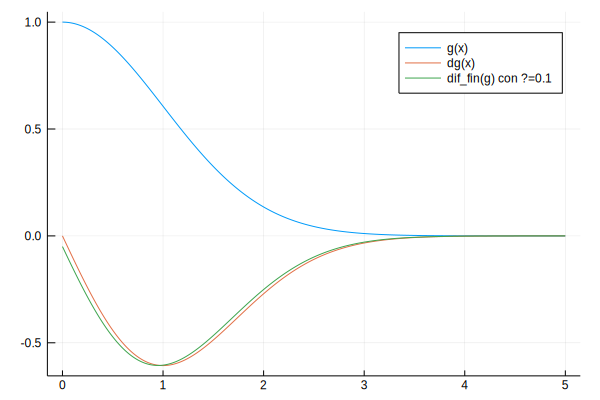

In [10]:
dominio = [i for i in 1e-15:1e-3:5]
δ=0.1
plot(dominio,[g(x) for x in dominio],lab="g(x)")
plot!(dominio,[dg(x) for x in dominio],lab="dg(x)")
plot!(dominio,[dif_fin(g,x,δ) for x in dominio],lab="dif_fin(g) con δ=$δ")

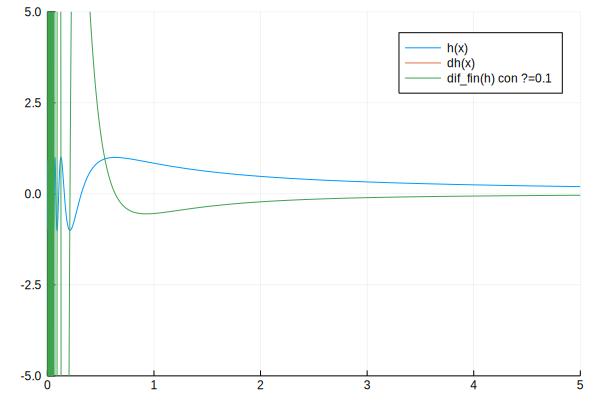

In [37]:
dominio = [i for i in 1e-15:1e-3:5]
plot(dominio,[h(x) for x in dominio],lab="h(x)",ylims=(-5,5),xlims=(0,5))
plot!(dominio,[dh(x) for x in dominio],lab="dh(x)")
plot!(dominio,[dif_fin(h,x,0.0001) for x in dominio],lab="dif_fin(h) con δ=$δ")

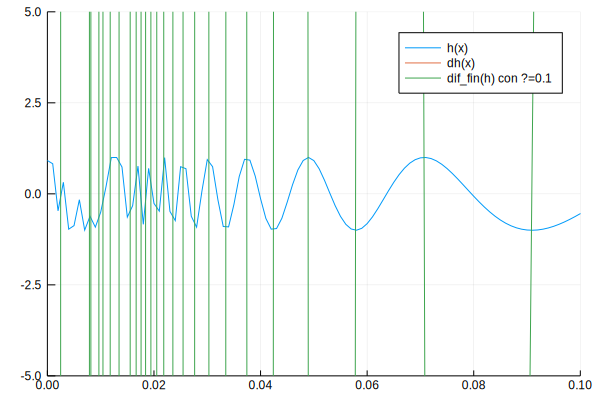

In [26]:
xlims!(0,0.1)

In [28]:
[dh(x) for x in dominio]

5000-element Array{Float64,1}:
       4.02184697808638e29 
 -562379.077116543         
  220962.31838689058       
 -105311.82438359146       
  -15061.769076530049      
  -19487.506998874545      
   27412.926257810876      
    1739.1713036382607     
  -12308.039252100258      
    4982.489466663226      
   -8623.188722824529      
    8104.457614850666      
     562.7711692208975     
       ⋮                   
      -0.03938766888571521 
      -0.039372202140493605
      -0.039356744436254976
      -0.0393412957660103  
      -0.039325856122777225
      -0.03931042549958005 
      -0.03929500388944982 
      -0.039279591285424166
      -0.03926418768054746 
      -0.0392487930678707  
      -0.03923340744045151 
      -0.0392180307913542  

In [32]:
dominio[4000:end]

1001-element Array{Float64,1}:
 3.999000000000001 
 4.000000000000001 
 4.001000000000001 
 4.002000000000001 
 4.003000000000001 
 4.004000000000001 
 4.005000000000001 
 4.006000000000001 
 4.007000000000001 
 4.008000000000001 
 4.009000000000001 
 4.010000000000001 
 4.011000000000001 
 ⋮                 
 4.988000000000001 
 4.989000000000001 
 4.990000000000001 
 4.991000000000001 
 4.992000000000001 
 4.993000000000001 
 4.994000000000001 
 4.995000000000001 
 4.996000000000001 
 4.997000000000001 
 4.998000000000001 
 4.9990000000000006

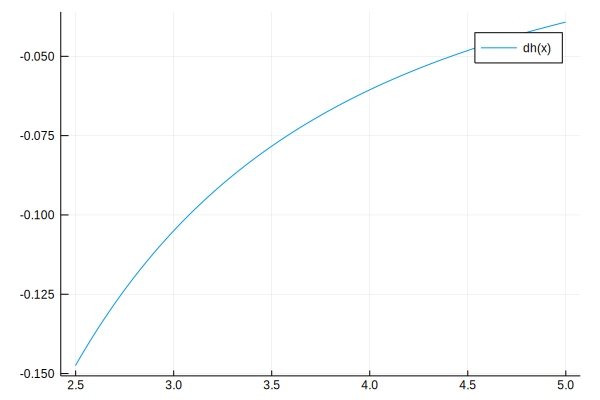

In [36]:
plot(dominio[2500:end],[dh(x) for x in dominio[2500:end]],lab="dh(x)")

(iii) Calcula el error desde el valor analítico que se comete al utilizar la aproximación de la derivada al tomar una $f$ y $a$ dadas, y al variar $h$.

Puedes espaciar los valores de $h$ de forma logarítmica. Hazlo para diferentes funciones y para valores de $h$ tan chicos como $10^{-15}$. (¡Escribe una función que haga el cálculo!) ¿Qué observas? ¿Qué podría causar este efecto?

In [38]:
maximum([1,3,5,7,89])

89

In [39]:
function mi_error(f,df,δ,dominio)
    errores = [abs(df(x)-dif_fin(f,x,δ)) for x in dominio]
    return maximum(errores)
end

mi_error (generic function with 1 method)

In [42]:
δ=0.0001
mi_error(g,dg,δ,dominio)

4.999999969512645e-5

In [43]:
mi_error(h,dh,δ,dominio)

4.02184697808638e29

In [44]:
pasos = [i for i in 1:-1e-3:1e-15]

errores = [mi_error(g,dg,paso,dominio) for paso in pasos ]

1000-element Array{Float64,1}:
 0.39346934028736624  
 0.3932560658957768   
 0.39304236531679726  
 0.3928282384865506   
 0.3926136853421131   
 0.39239870582151654  
 0.3921832998637492   
 0.39196746740875654  
 0.39175120839744243  
 0.3915345227716706   
 0.39131741047426516  
 0.3910998714490124   
 0.39088190564066116  
 ⋮                    
 0.005999784005181117 
 0.005499833628356977 
 0.004999875002086424 
 0.004499908876236014 
 0.003999936000683264 
 0.0034999571253562034
 0.0029999730001644465
 0.002499984375069594 
 0.0019999920000114387
 0.0014999966250196484
 0.0009999989999943653
 0.0004999998749467537

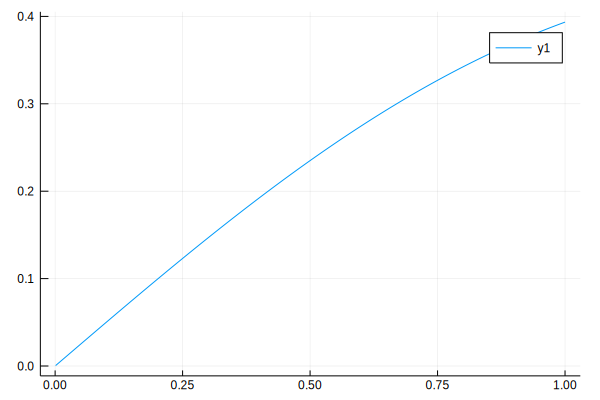

In [45]:
plot(pasos,errores)

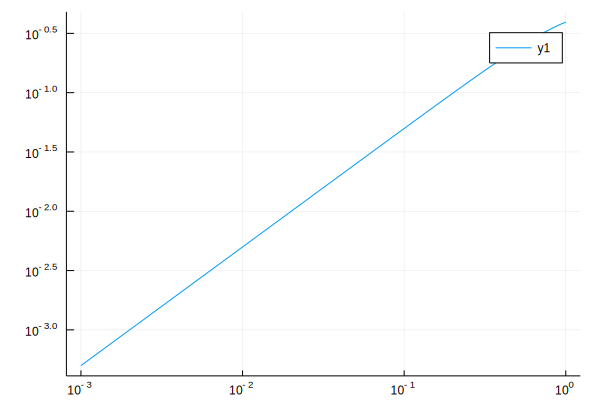

In [46]:
plot(pasos,errores,xscale=:log10, yscale=:log10)

In [49]:
(log(errores[1])-log(errores[end]))/(log(pasos[1])-log(pasos[end]))

0.9653136671431092

In [50]:
function dif_fin_central(f,a,h)
    return (f(a+h)-f(a-h))/(2h)
end

dif_fin_central (generic function with 1 method)

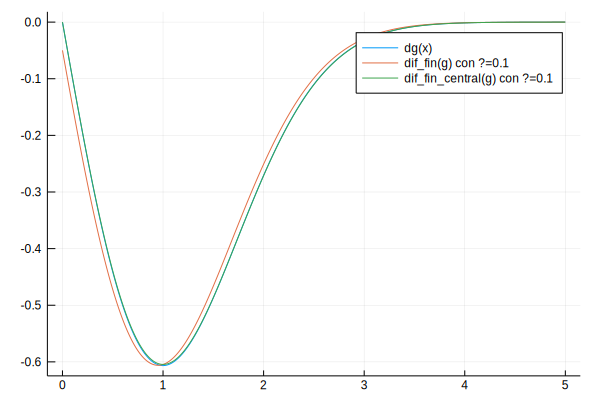

In [55]:
dominio = [i for i in 1e-15:1e-3:5]
δ=0.1
#plot(dominio,[g(x) for x in dominio],lab="g(x)")
plot(dominio,[dg(x) for x in dominio],lab="dg(x)")
plot!(dominio,[dif_fin(g,x,δ) for x in dominio],lab="dif_fin(g) con δ=$δ")
plot!(dominio,[dif_fin_central(g,x,δ) for x in dominio],lab="dif_fin_central(g) con δ=$δ")

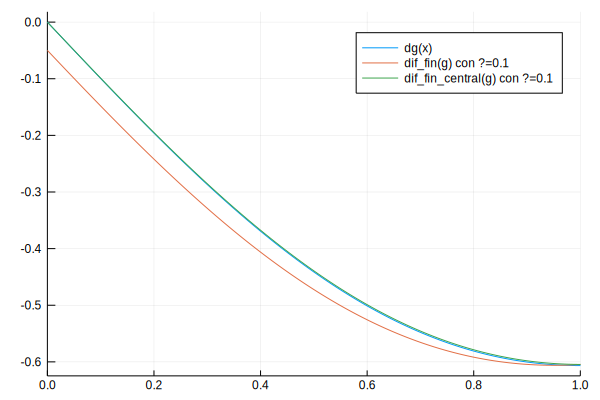

In [56]:
xlims!(0,1)

# Integración Numérica

A menudo en la física, es necesario evaluar integrales feas. [La verdad es que casi todas las integrales son feas...] Mientras que la diferenciación es un proceso que se puede llevar a cabo de manera algorítmica, siguiendo una receta, la integración no lo es. De hecho, se puede demostrar que hay integrales que no se pueden llevar a cabo de forma analítica en términos de las funciones elementales; un ejemplo famoso, y de suma importancia, es la llamada función error, dada por

$$\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^x e^{-t^2} \, dt,$$

Por lo tanto, necesitamos encontrar maneras de aproximar integrales definidas, de forma numérica.

Recordemos que la integral

$$I(f) = \int_a^b f(x) \, dx$$

representa el área debajo de la curva $y=f(x)$ entre $x=a$ y $x=b$. Por lo tanto, la integración numérica también se llama "cuadratura numérica". [Ver, por ejemplo, https://es.wikipedia.org/wiki/Cuadratura_del_c%C3%ADrculo.] Por lo tanto, da una manera de aproximar numéricamente una integral de Riemann.


(i) La idea más natural [pero ¡no necesariamente mejor!] es dividir el intervalo $[a, b]$ en $N$ intervalos iguales de longitud $h=1/N$. Dada una $x$ y una $N$, dibuja la función, así como líneas verticales punteadas [dibujar con linestyle=:dash] en los nodos. Grafícalo.

In [59]:
f(x) = exp(-x^2)

plot(f,leg=false)

a = 0
b = 2
N=8
nodos = range(a,stop=b,length=N)

0.0:0.2857142857142857:2.0

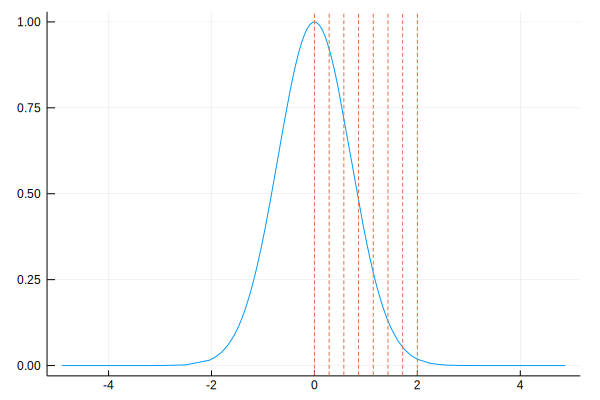

In [60]:
vline!(nodos,ls=:dash)

In [61]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6081449759963788066\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-1589855493792266391\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/88cd27cdcb86b1e8696ef692110cc83502b55afc-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-6081449759963788066\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

In [63]:
collect(0:10)

11-element Array{Int64,1}:
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [79]:
a=0
b=5
@manipulate for n in 1:50
    nodos = collect(range(a,stop=b,length=n))
    h = nodos[2]-nodos[1]
    
    p=plot(nodos,[f(x) for x in nodos],leg=false)
    
    for x in nodos
        plot!([x,x],[0,f(x)],c=:black,alpha=0.5)
        plot!([x,x+h],[f(x+h),f(x+h)],ls=:dash, 
            c=:black, fill=(0,f(x),:orange),alpha=0.1)
        plot!([x,x+h],[f(x),f(x)],ls=:dash, 
            c=:black, fill=(0,:blue), alpha=0.1)
    
    end
    title!("rectangulos")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>50,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
25, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/mvb/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/mvb/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/mvb/.julia/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/home/mvb/.julia/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/home/mvb/.julia/packages/Interact/Fs3lV/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"13328389968519698674\",\"id\":\"ob_86\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"13328389968

In [89]:
nodos = collect(range(a,stop=b,length=10000))
dx = nodos[2]-nodos[1]

alturas_sup = [f(i) for i in nodos[1:end-1]]

sum(alturas_sup)*dx

0.8864769504538924

In [90]:
alturas_inf = [f(i) for i in nodos[2:end]]

sum(alturas_inf)*dx

0.8859769004488988